# Project: Image Classification


Develop a machine learning model to classify images into diferent categories. Using  machine learning techniques to build a robust image classifier to understand the datatset, classes and look for the best and accurate classification performance

In [2]:
## Import Libraries
import numpy as np
import matplotlib.pyplot as plt
import tensorflow_datasets as tfds

/Users/jnova/.pyenv/versions/3.9.10/envs/csis3290/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
from sklearn.model_selection import train_test_split

# Load train and test data
dataset = tfds.load('eurosat/rgb', split='train')

# Extract features and labels
X = []
y = []
for example in tfds.as_numpy(dataset):
    X.append(example['image'])
    y.append(example['label'])

X = np.array(X)
y = np.array(y)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

2024-04-15 11:02:42.068850: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


## Data Analysis

I have chosen the Eurosat dataset, which consists of 21,600 training images and 5,400 testing images. Each image is a grayscale 64x64 pixel representation of a fashion item, categorized into 10 classes as we see below

In [4]:
# Dataset Analysis
print("Train Data Shape:", X_train.shape)
print("Test Data Shape:", X_test.shape)
print("Train Labels Shape:", y_train.shape)
print("Test Labels Shape:", y_test.shape)
print("Train Data classes:", len(set(y_train.flatten())))
print("Test Data classes:", len(set(y_test.flatten())))

Train Data Shape: (21600, 64, 64, 3)
Test Data Shape: (5400, 64, 64, 3)
Train Labels Shape: (21600,)
Test Labels Shape: (5400,)
Train Data classes: 10
Test Data classes: 10


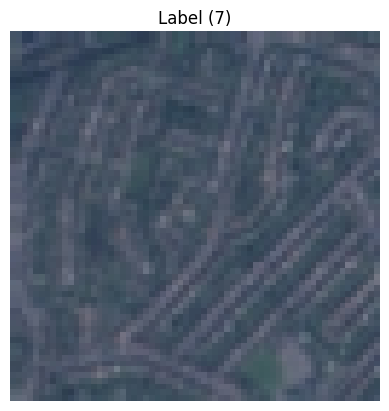

In [26]:
# Select a random sample from the training data
sample_index = 1  # Change this to view different samples
sample_image = X_train[sample_index]
sample_label = y_train[sample_index]

# Display the sample image
plt.imshow(sample_image, cmap='gray')
plt.title(f'Label ({sample_label})')
plt.axis('off')
plt.show()

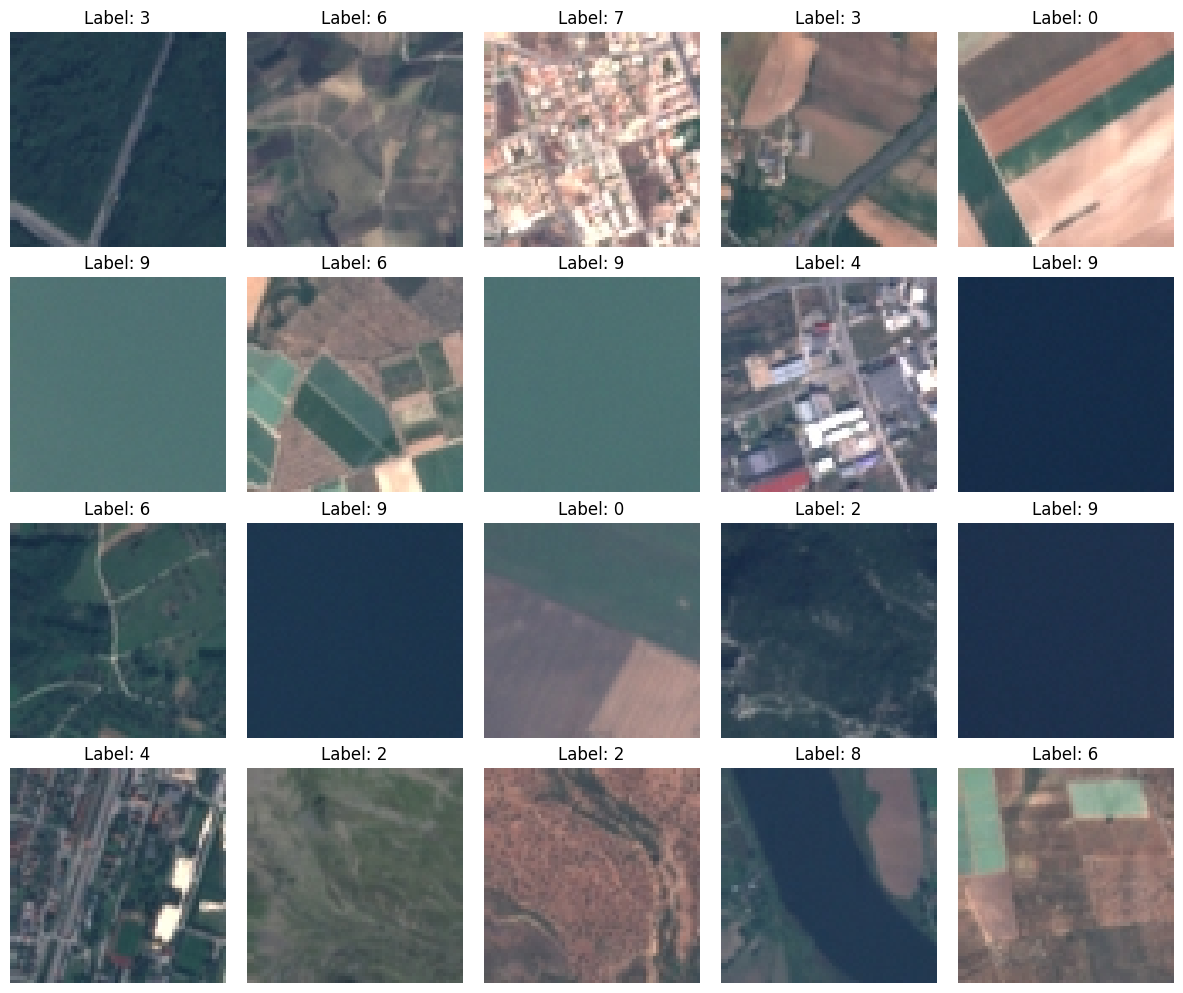

In [27]:
# Define the number of rows and columns for subplots
num_rows = 4
num_cols = 5
num_samples = num_rows * num_cols

# Randomly select samples
random_indices = np.random.choice(len(X_train), size=num_samples, replace=False)

# Create subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(12, 10))

# Flatten the axes array
axes = axes.flatten()

# Display samples
for i, index in enumerate(random_indices):
    sample_image = X_train[index]
    sample_label = y_train[index]
    
    axes[i].imshow(sample_image, cmap='gray')
    axes[i].set_title(f'Label: {sample_label}')
    axes[i].axis('off')

plt.tight_layout()
plt.show()

# Feature Analysis

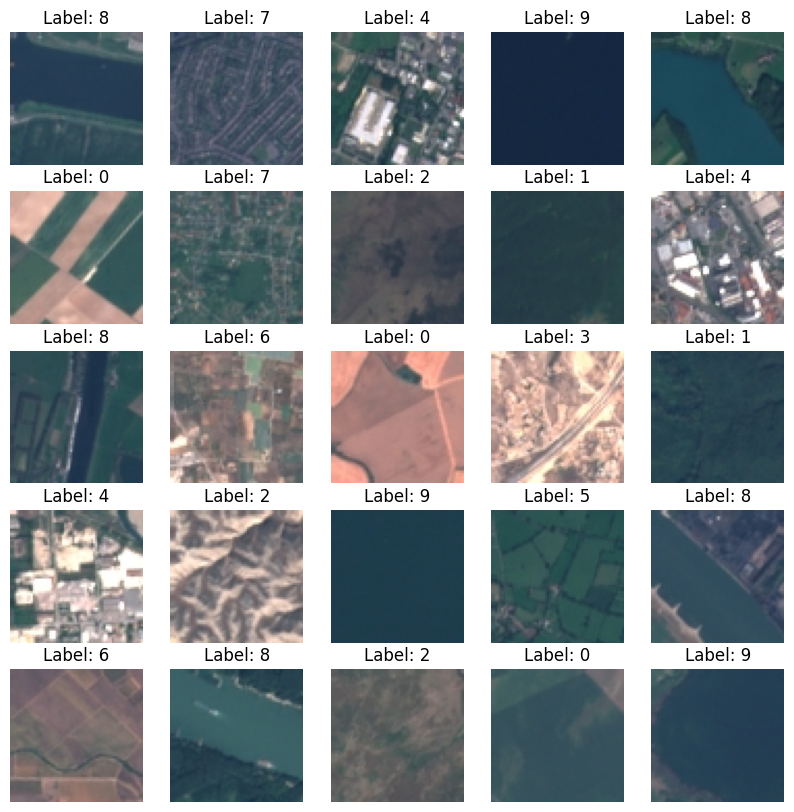

In [28]:
plt.figure(figsize=(10, 10))
for i in range(25):
    plt.subplot(5, 5, i+1)
    plt.imshow(X_train[i], cmap='gray')
    plt.title(f'Label: {y_train[i]}')
    plt.axis('off')
plt.show()

## Visualize Dataset

As we can see all the number of classes and train and test data are the same, so the split will be well splitted to test all the classes

In [4]:
print("Train Data classes:", len(set(y_train.flatten())))
print("Test Data classes:", len(set(y_test.flatten())))

Train Data classes: 10
Test Data classes: 10


As we can see below the train and test splits has similar distributions, but for some classes (3,4,5,6,8) there are fewer examples, the class 5 has 1500 examples so it can conduct to wrong predictions

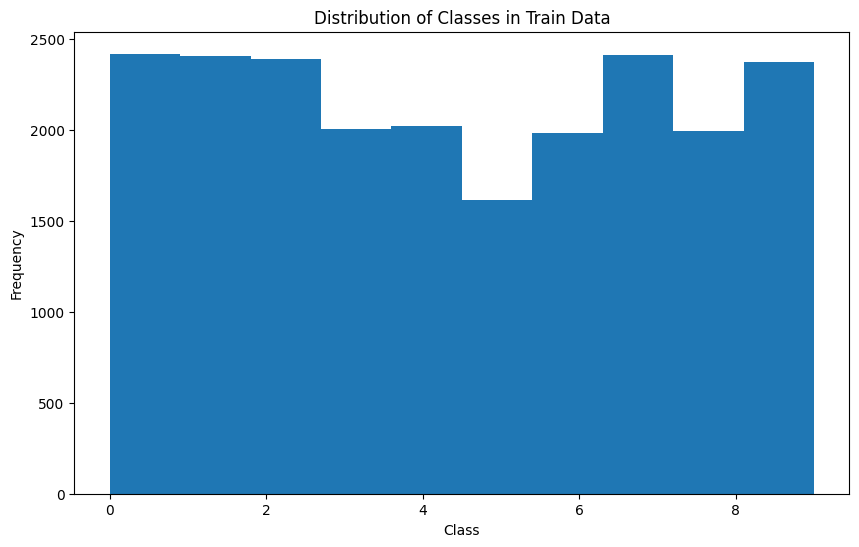

In [30]:
plt.figure(figsize=(10, 6))
plt.hist(y_train, bins=10)
plt.title('Distribution of Classes in Train Data')
plt.xlabel('Class')
plt.ylabel('Frequency')
plt.show()

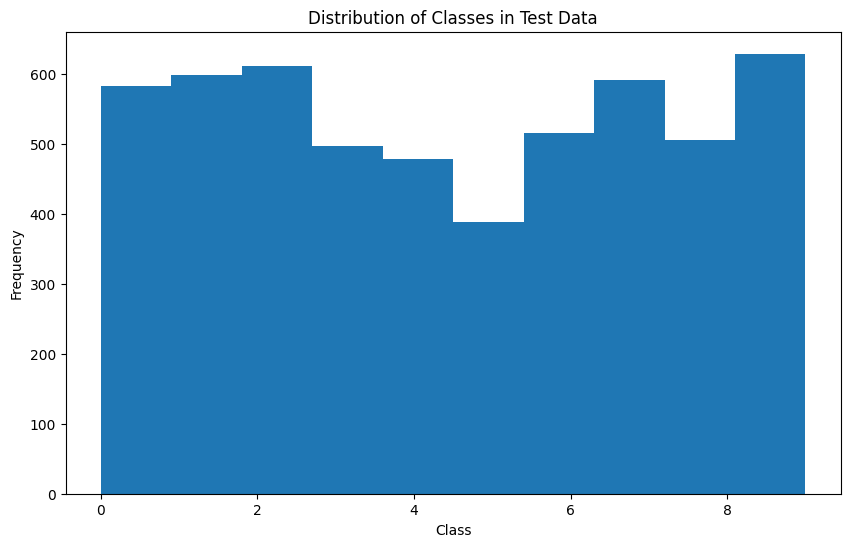

In [31]:
plt.figure(figsize=(10, 6))
plt.hist(y_test, bins=10)
plt.title('Distribution of Classes in Test Data')
plt.xlabel('Class')
plt.ylabel('Frequency')
plt.show()

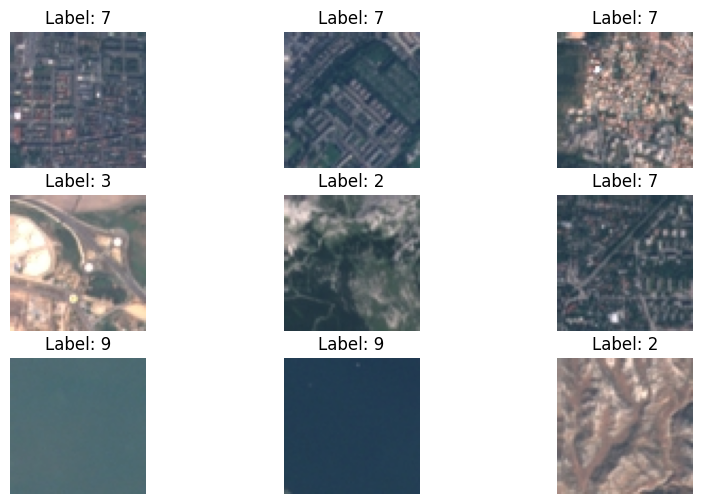

In [32]:
plt.figure(figsize=(10, 6))
for i in range(9):
    plt.subplot(3, 3, i+1)
    random_index = np.random.randint(0, len(X_train))
    plt.imshow(X_train[random_index], cmap='gray')
    plt.title(f'Label: {y_train[random_index]}')
    plt.axis('off')
plt.show()


# Apply ML Models

In [5]:
# Flatten the images
X_train_flat = X_train.reshape(X_train.shape[0], -1)
X_test_flat = X_test.reshape(X_test.shape[0], -1)

# Normalize the pixel values
X_train_flat = X_train_flat.astype('float32') / 255
X_test_flat = X_test_flat.astype('float32') / 255

## Support Vector Machine (SVM)

In [34]:
# Support Vector Machine (SVM)
from sklearn.svm import SVC
from sklearn.metrics import classification_report

svm_model = SVC()
svm_model.fit(X_train_flat, y_train.ravel())
svm_pred = svm_model.predict(X_test_flat)

print(classification_report(y_test.ravel(), svm_pred))

              precision    recall  f1-score   support

           0       0.60      0.64      0.62       583
           1       0.76      0.87      0.81       598
           2       0.62      0.61      0.61       612
           3       0.52      0.28      0.36       497
           4       0.82      0.89      0.85       479
           5       0.61      0.81      0.69       389
           6       0.58      0.42      0.49       516
           7       0.57      0.80      0.66       592
           8       0.63      0.58      0.61       505
           9       0.90      0.72      0.80       629

    accuracy                           0.66      5400
   macro avg       0.66      0.66      0.65      5400
weighted avg       0.66      0.66      0.65      5400



In [35]:
# Fine tuning hyperparameters Support Vector Machine
from sklearn.model_selection import cross_validate

# Perform cross-validation
scoring = ['accuracy', 'precision_macro', 'recall_macro', 'f1_macro']
cv_results = cross_validate(SVC(), X_train_flat, y_train.ravel(), cv=3, scoring=scoring)

# Print the cross-validation results
print("Cross-Validation Results:")
for metric in scoring:
	print(f"{metric.capitalize()}: {np.mean(cv_results[f'test_{metric}']):.2f}")

Cross-Validation Results:
Accuracy: 0.65
Precision_macro: 0.65
Recall_macro: 0.65
F1_macro: 0.64


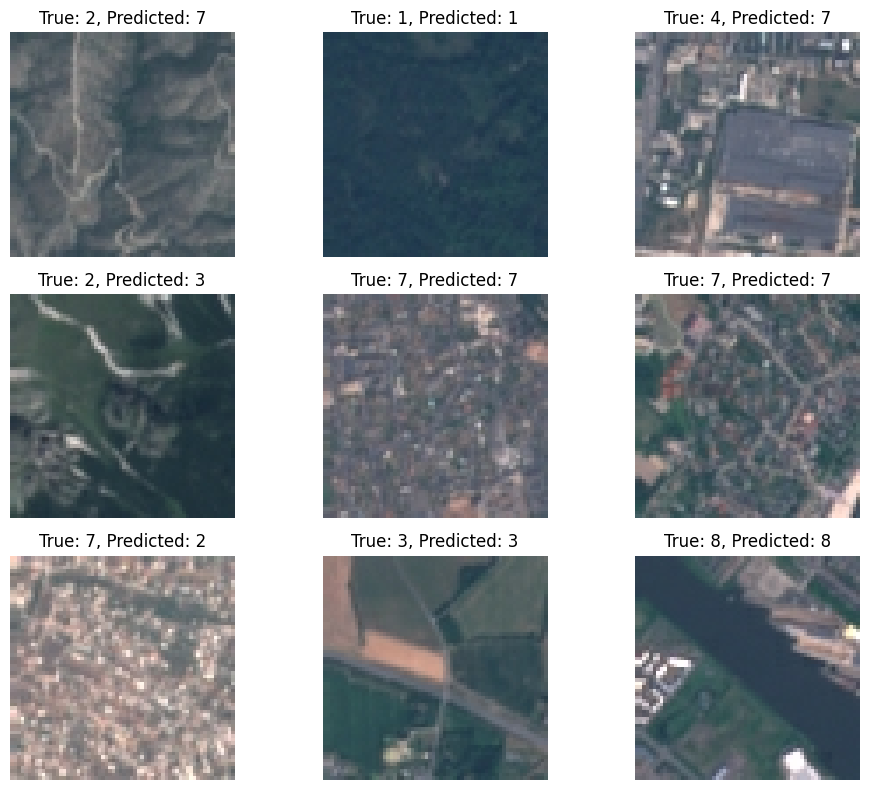

In [36]:
# Visualize Support Vector Machine (SVM) Predictions
plt.figure(figsize=(10, 8))
for i in range(9):
    plt.subplot(3, 3, i+1)
    index = np.random.randint(0, len(X_test))
    plt.imshow(X_test[index], cmap='gray')
    plt.title(f"True: {y_test[index]}, Predicted: {svm_pred[index]}")
    plt.axis('off')

plt.tight_layout()
plt.show()

## Random Forest Classifier

In [37]:
# Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

rf_model = RandomForestClassifier()
rf_model.fit(X_train_flat, y_train.ravel())
rf_pred = rf_model.predict(X_test_flat)

print(classification_report(y_test.ravel(), rf_pred))

              precision    recall  f1-score   support

           0       0.61      0.72      0.66       583
           1       0.85      0.90      0.88       598
           2       0.63      0.56      0.59       612
           3       0.50      0.30      0.38       497
           4       0.70      0.86      0.78       479
           5       0.68      0.81      0.74       389
           6       0.48      0.34      0.40       516
           7       0.55      0.66      0.60       592
           8       0.63      0.64      0.64       505
           9       0.95      0.90      0.93       629

    accuracy                           0.67      5400
   macro avg       0.66      0.67      0.66      5400
weighted avg       0.67      0.67      0.66      5400



In [38]:
# Fine tuning hyperparameters Random Forest Classifier
from sklearn.model_selection import cross_validate

# Perform cross-validation
scoring = ['accuracy', 'precision_macro', 'recall_macro', 'f1_macro']
cv_results = cross_validate(RandomForestClassifier(), X_train_flat, y_train.ravel(), cv=3, scoring=scoring)

# Print the cross-validation results
print("Cross-Validation Results:")
for metric in scoring:
	print(f"{metric.capitalize()}: {np.mean(cv_results[f'test_{metric}']):.2f}")

Cross-Validation Results:
Accuracy: 0.66
Precision_macro: 0.65
Recall_macro: 0.66
F1_macro: 0.65


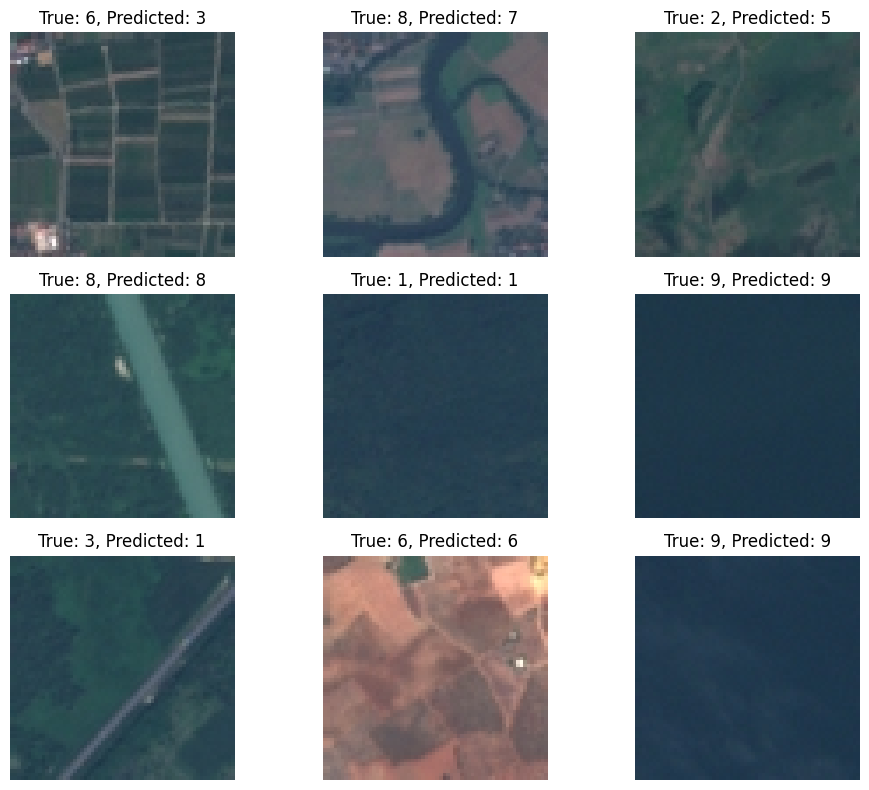

In [39]:
# Visualize Random Forest Classifier Predictions
plt.figure(figsize=(10, 8))
for i in range(9):
    plt.subplot(3, 3, i+1)
    index = np.random.randint(0, len(X_test))
    plt.imshow(X_test[index], cmap='gray')
    plt.title(f"True: {y_test[index]}, Predicted: {rf_pred[index]}")
    plt.axis('off')

plt.tight_layout()
plt.show()


## Decision Tree Classifier

In [40]:
# Decision Tree Classifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report

tree_classifier = DecisionTreeClassifier()
tree_classifier.fit(X_train_flat, y_train.ravel())
tree_classifier_pred = tree_classifier.predict(X_test_flat)

print(classification_report(y_test.ravel(), tree_classifier_pred))

              precision    recall  f1-score   support

           0       0.44      0.45      0.45       583
           1       0.75      0.74      0.75       598
           2       0.34      0.36      0.35       612
           3       0.20      0.19      0.19       497
           4       0.54      0.44      0.49       479
           5       0.48      0.56      0.51       389
           6       0.25      0.23      0.24       516
           7       0.38      0.40      0.39       592
           8       0.40      0.38      0.39       505
           9       0.72      0.77      0.75       629

    accuracy                           0.46      5400
   macro avg       0.45      0.45      0.45      5400
weighted avg       0.46      0.46      0.46      5400



In [41]:
# Fine tuning hyperparameters Decision Tree Classifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import classification_report

param_grid = {
	'criterion': ['gini', 'entropy'],
	'splitter': ['best', 'random'],
	'max_depth': [None, 10, 20, 30, 40],
	'min_samples_split': [2, 5, 10],
	'min_samples_leaf': [1, 2, 4]
}

# Perform grid search with cross-validation
grid_search = RandomizedSearchCV(DecisionTreeClassifier(), param_distributions=param_grid, n_iter=10, cv=3)
grid_search.fit(X_train_flat, y_train.ravel())

# Print the best parameters and best score
print("Best Parameters:", grid_search.best_params_)
print("Best Score:", grid_search.best_score_)

# Evaluate the best model on the test set
best_model = grid_search.best_estimator_
best_model.fit(X_train_flat, y_train.ravel())
y_val_pred_tuned = best_model.predict(X_test_flat)

# Generate and print classification report
print(classification_report(y_test.ravel(), y_val_pred_tuned))

Best Parameters: {'splitter': 'random', 'min_samples_split': 2, 'min_samples_leaf': 4, 'max_depth': 10, 'criterion': 'gini'}
Best Score: 0.45384259259259263
              precision    recall  f1-score   support

           0       0.44      0.44      0.44       583
           1       0.74      0.82      0.78       598
           2       0.32      0.40      0.36       612
           3       0.28      0.12      0.17       497
           4       0.55      0.49      0.52       479
           5       0.48      0.60      0.53       389
           6       0.28      0.16      0.20       516
           7       0.29      0.46      0.35       592
           8       0.46      0.45      0.45       505
           9       0.82      0.69      0.75       629

    accuracy                           0.47      5400
   macro avg       0.46      0.46      0.45      5400
weighted avg       0.47      0.47      0.46      5400



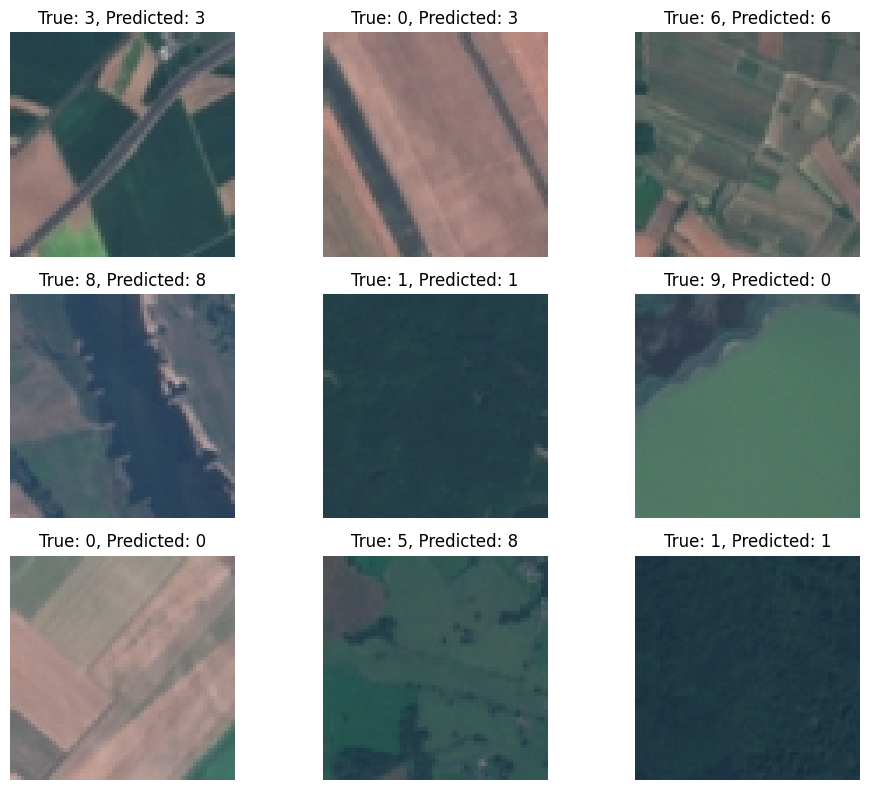

In [42]:
# Visualize Decision Tree Classifier Predictions
plt.figure(figsize=(10, 8))
for i in range(9):
    plt.subplot(3, 3, i+1)
    index = np.random.randint(0, len(X_test))
    plt.imshow(X_test[index], cmap='gray')
    plt.title(f"True: {y_test[index]}, Predicted: {tree_classifier_pred[index]}")
    plt.axis('off')

plt.tight_layout()
plt.show()

## Logistic Regression

In [43]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

lr_model = LogisticRegression(max_iter=50)
lr_model.fit(X_train_flat, y_train.ravel())
lr_model_pred = lr_model.predict(X_test_flat)

print(classification_report(y_test.ravel(), lr_model_pred))

/Users/jnova/.pyenv/versions/3.9.10/envs/csis3290/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


              precision    recall  f1-score   support

           0       0.32      0.49      0.39       583
           1       0.51      0.59      0.55       598
           2       0.29      0.14      0.18       612
           3       0.19      0.15      0.17       497
           4       0.59      0.69      0.64       479
           5       0.38      0.41      0.39       389
           6       0.26      0.08      0.12       516
           7       0.33      0.42      0.37       592
           8       0.41      0.41      0.41       505
           9       0.36      0.41      0.39       629

    accuracy                           0.38      5400
   macro avg       0.36      0.38      0.36      5400
weighted avg       0.36      0.38      0.36      5400



In [44]:
# Fine tuning hyperparameters Logistic Regression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report

param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'penalty': ['l1', 'l2']
}

# Perform grid search with cross-validation
grid_search = GridSearchCV(LogisticRegression(max_iter=50), param_grid, cv=2)
grid_search.fit(X_train_flat, y_train.ravel())

# Print the best parameters and best score
print("Best Parameters:", grid_search.best_params_)
print("Best Score:", grid_search.best_score_)

# Evaluate the best model on the test set
best_model = grid_search.best_estimator_
best_model.fit(X_train_flat, y_train.ravel())
y_val_pred_tuned = best_model.predict(X_test_flat)

# Generate and print classification report
print(classification_report(y_test.ravel(), y_val_pred_tuned))

/Users/jnova/.pyenv/versions/3.9.10/envs/csis3290/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/jnova/.pyenv/versions/3.9.10/envs/csis3290/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-le

Best Parameters: {'C': 0.001, 'penalty': 'l2'}
Best Score: 0.39537037037037037


/Users/jnova/.pyenv/versions/3.9.10/envs/csis3290/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


              precision    recall  f1-score   support

           0       0.35      0.60      0.44       583
           1       0.51      0.59      0.55       598
           2       0.37      0.16      0.22       612
           3       0.19      0.10      0.13       497
           4       0.56      0.68      0.62       479
           5       0.35      0.37      0.36       389
           6       0.20      0.04      0.06       516
           7       0.37      0.51      0.43       592
           8       0.42      0.39      0.40       505
           9       0.43      0.55      0.48       629

    accuracy                           0.40      5400
   macro avg       0.38      0.40      0.37      5400
weighted avg       0.38      0.40      0.37      5400



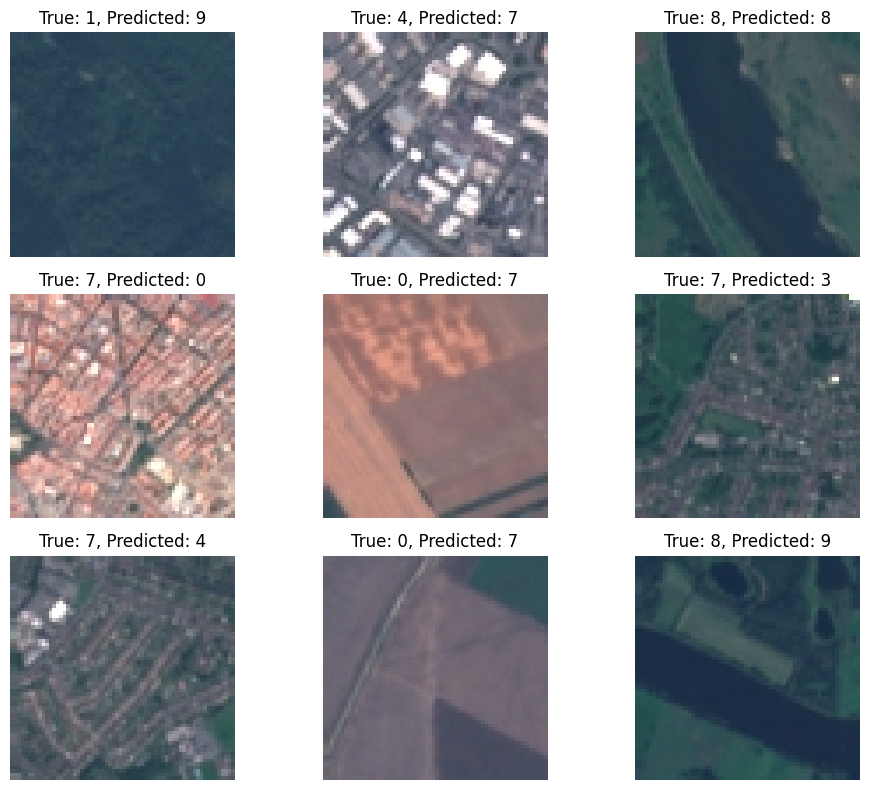

In [45]:
# Visualize Decision Tree Classifier Predictions
plt.figure(figsize=(10, 8))
for i in range(9):
    plt.subplot(3, 3, i+1)
    index = np.random.randint(0, len(X_test))
    plt.imshow(X_test[index], cmap='gray')
    plt.title(f"True: {y_test[index]}, Predicted: {lr_model_pred[index]}")
    plt.axis('off')

plt.tight_layout()
plt.show()

## Naive Bayes

In [46]:
# Naive Bayes
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report

nb_model = GaussianNB()
nb_model.fit(X_train_flat, y_train.ravel())
nb_model_pred = nb_model.predict(X_test_flat)

print(classification_report(y_test.ravel(), nb_model_pred))

              precision    recall  f1-score   support

           0       0.50      0.30      0.38       583
           1       0.60      0.90      0.72       598
           2       0.21      0.20      0.21       612
           3       0.25      0.05      0.08       497
           4       0.54      0.71      0.62       479
           5       0.24      0.69      0.36       389
           6       0.29      0.23      0.26       516
           7       0.20      0.15      0.17       592
           8       0.20      0.19      0.19       505
           9       0.28      0.16      0.21       629

    accuracy                           0.35      5400
   macro avg       0.33      0.36      0.32      5400
weighted avg       0.33      0.35      0.32      5400



In [47]:
# Fine tuning hyperparameters Naive Bayes
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report

param_grid = {
	'var_smoothing': [1e-9, 1e-8, 1e-7, 1e-6]
}

# Perform grid search with cross-validation
grid_search = GridSearchCV(nb_model, param_grid, cv=2)
grid_search.fit(X_train_flat, y_train.ravel())

# Print the best parameters and best score
print("Best Parameters:", grid_search.best_params_)
print("Best Score:", grid_search.best_score_)

# Evaluate the best model on the test set
best_model = grid_search.best_estimator_
best_model.fit(X_train_flat, y_train.ravel())
y_val_pred_tuned = best_model.predict(X_test_flat)

# Generate and print classification report
print(classification_report(y_test.ravel(), y_val_pred_tuned))

Best Parameters: {'var_smoothing': 1e-09}
Best Score: 0.35712962962962963
              precision    recall  f1-score   support

           0       0.50      0.30      0.38       583
           1       0.60      0.90      0.72       598
           2       0.21      0.20      0.21       612
           3       0.25      0.05      0.08       497
           4       0.54      0.71      0.62       479
           5       0.24      0.69      0.36       389
           6       0.29      0.23      0.26       516
           7       0.20      0.15      0.17       592
           8       0.20      0.19      0.19       505
           9       0.28      0.16      0.21       629

    accuracy                           0.35      5400
   macro avg       0.33      0.36      0.32      5400
weighted avg       0.33      0.35      0.32      5400



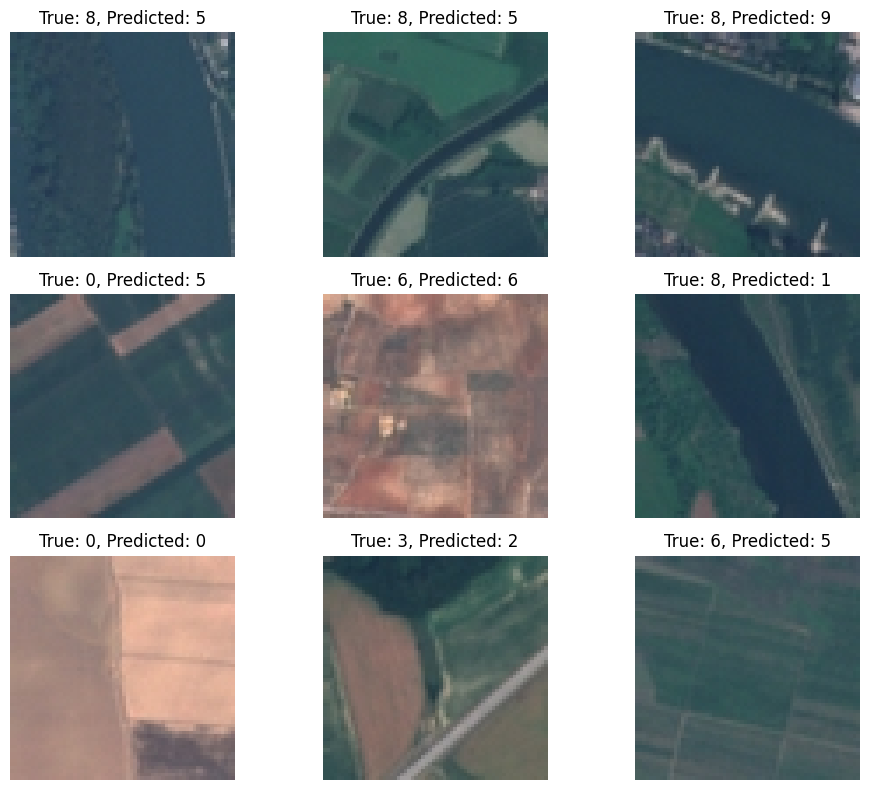

In [48]:
# Visualize Decision Naive Bayes Predictions
plt.figure(figsize=(10, 8))
for i in range(9):
    plt.subplot(3, 3, i+1)
    index = np.random.randint(0, len(X_test))
    plt.imshow(X_test[index], cmap='gray')
    plt.title(f"True: {y_test[index]}, Predicted: {nb_model_pred[index]}")
    plt.axis('off')

plt.tight_layout()
plt.show()

## K-Nearest Neighbors

In [49]:
# K-Nearest Neighbors Model
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report

knn_model = KNeighborsClassifier(n_neighbors=10)
knn_model.fit(X_train_flat, y_train.ravel())
knn_model_pred = knn_model.predict(X_test_flat)

print(classification_report(y_test.ravel(), knn_model_pred))

              precision    recall  f1-score   support

           0       0.41      0.62      0.49       583
           1       0.70      0.54      0.61       598
           2       0.29      0.58      0.39       612
           3       0.56      0.02      0.04       497
           4       1.00      0.00      0.00       479
           5       0.45      0.29      0.35       389
           6       0.41      0.02      0.03       516
           7       0.52      0.02      0.04       592
           8       0.69      0.11      0.20       505
           9       0.25      0.97      0.40       629

    accuracy                           0.34      5400
   macro avg       0.53      0.32      0.26      5400
weighted avg       0.52      0.34      0.27      5400



In [50]:
# Fine tuning hyperparameters K-Nearest Neighbors
from sklearn.model_selection import cross_validate

# Perform cross-validation
scoring = ['accuracy', 'precision_macro', 'recall_macro', 'f1_macro']
cv_results = cross_validate(KNeighborsClassifier(n_neighbors=10), X_train_flat, y_train.ravel(), cv=3, scoring=scoring)

# Print the cross-validation results
print("Cross-Validation Results:")
for metric in scoring:
	print(f"{metric.capitalize()}: {np.mean(cv_results[f'test_{metric}']):.2f}")

Cross-Validation Results:
Accuracy: 0.33
Precision_macro: 0.45
Recall_macro: 0.31
F1_macro: 0.24


/Users/jnova/.pyenv/versions/3.9.10/envs/csis3290/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


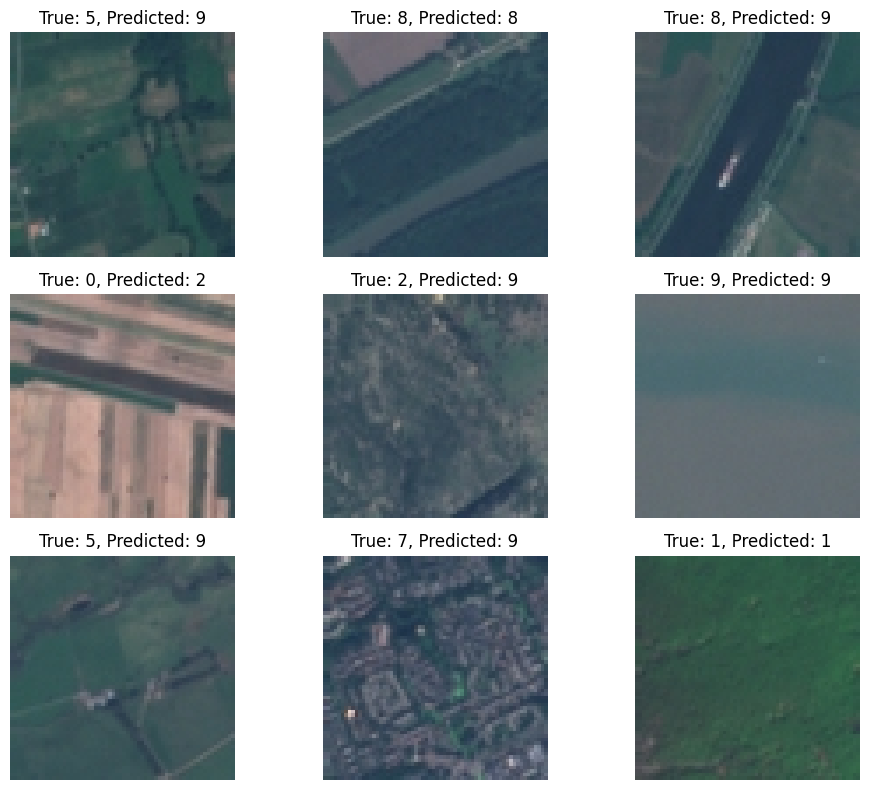

In [51]:
# Visualize Decision K-Nearest Neighbors Predictions
plt.figure(figsize=(10, 8))
for i in range(9):
    plt.subplot(3, 3, i+1)
    index = np.random.randint(0, len(X_test))
    plt.imshow(X_test[index], cmap='gray')
    plt.title(f"True: {y_test[index]}, Predicted: {knn_model_pred[index]}")
    plt.axis('off')

plt.tight_layout()
plt.show()

## Convolutional Neural Networks (CNN)

In [6]:
# Convolutional Neural Networks Model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

cnn_model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(64, 64, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')  # 10 classes
])

cnn_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
cnn_model.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test))
cnn_loss, cnn_accuracy = cnn_model.evaluate(X_test, y_test)
cnn_pred = cnn_model.predict(X_test)
print("CNN Validation Accuracy:", cnn_accuracy)

/Users/jnova/.pyenv/versions/3.9.10/envs/csis3290/lib/python3.9/site-packages/keras/src/layers/convolutional/base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


Epoch 1/10
675/675 ━━━━━━━━━━━━━━━━━━━━ 57s 83ms/step - accuracy: 0.3778 - loss: 6.6697 - val_accuracy: 0.5274 - val_loss: 1.3209
Epoch 2/10
675/675 ━━━━━━━━━━━━━━━━━━━━ 54s 79ms/step - accuracy: 0.6216 - loss: 1.0460 - val_accuracy: 0.6424 - val_loss: 1.0269
Epoch 3/10
675/675 ━━━━━━━━━━━━━━━━━━━━ 52s 77ms/step - accuracy: 0.7184 - loss: 0.8077 - val_accuracy: 0.7141 - val_loss: 0.8068
Epoch 4/10
675/675 ━━━━━━━━━━━━━━━━━━━━ 56s 83ms/step - accuracy: 0.7601 - loss: 0.6894 - val_accuracy: 0.7415 - val_loss: 0.7768
Epoch 5/10
675/675 ━━━━━━━━━━━━━━━━━━━━ 47s 69ms/step - accuracy: 0.8270 - loss: 0.5056 - val_accuracy: 0.7344 - val_loss: 0.8406
Epoch 6/10
675/675 ━━━━━━━━━━━━━━━━━━━━ 48s 70ms/step - accuracy: 0.8585 - loss: 0.4216 - val_accuracy: 0.7346 - val_loss: 0.9065
Epoch 7/10
675/675 ━━━━━━━━━━━━━━━━━━━━ 47s 69ms/step - accuracy: 0.8887 - loss: 0.3323 - val_accuracy: 0.7044 - val_loss: 1.0775
Epoch 8/10
675/675 ━━━━━━━━━━━━━━━━━━━━ 46s 69ms/step - accuracy: 0.9017 - loss: 0.2992 - 

169/169 ━━━━━━━━━━━━━━━━━━━━ 4s 23ms/step


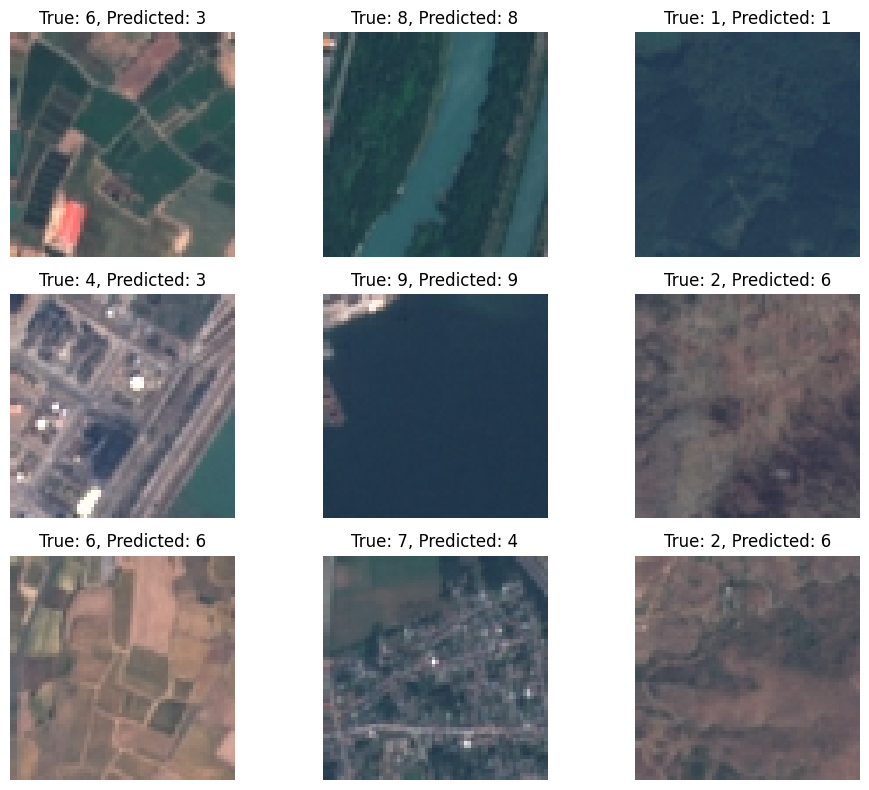

In [7]:
# Visualize CNN Predictions
cnn_pred = cnn_model.predict(X_test)
plt.figure(figsize=(10, 8))
for i in range(9):
    plt.subplot(3, 3, i+1)
    index = np.random.randint(0, len(X_test))
    plt.imshow(X_test[index], cmap='gray')
    plt.title(f"True: {y_test[index]}, Predicted: {cnn_pred[index].argmax()}")
    plt.axis('off')

plt.tight_layout()
plt.show()

# Conclusions

- I have tested the following machine learning models ordered with the best and worst performance:
	- Random Forest: 0.67
	- Support Vector Machines: 0.66
	- Convolutional Neural Networks: 0.57
	- Decision Tree Classifier: 0.46 
	- LogisticRegression: 0.38
	- Naive Bayes: 0.35 
	- K-Nearest Neighbors: 0.34
- Based on the information above we have tried many machine learning models and the models with the best accuracy are (Random Forest , Support Vector Machine and Convolutional Neural Networks), besides of that we can see the model is underifiting, it could be because there are an imbalanced number of samples in some classes (3,4,5,8) as we saw in the class distributions above, so it can leads to wrong predictions and decrease the model performance.
- I have applied some techniques to increase the model performance like Fine-tuning hyperparameters using the functions (GridSearchCV, RandomizedSearchCV, Cross_Validation), after applying the hyperparameters cross validation to the models i got better performance given us to understant the importance of hyperparameter optimization in ML models.
- As we can see some models are more accurated than others so after some metric evaluations we can conclude that the best machine learning models for this problem are (Random Forest, Support Vector Machines and Convolutional Neural Networks).